In [116]:
import numpy as np
from tqdm import tqdm
from scipy.sparse import csr_array
import matplotlib.pyplot as plt
import pickle
import warnings
import pandas
import time
import pickle
# import hypernetx as hnx
from itertools import chain
import pyalex
import json
import os
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pyalex.config.email = "l.jiaze@maastrichtuniversity.nl"
pyalex.config.max_retries = 0
pyalex.config.retry_backoff_factor = 0.1
pyalex.config.retry_http_codes = [429, 500, 503]

In [6]:
def print_json(sample):
    print(json.dumps(sample, indent=4))

# Papers

In [8]:
work = Works()["W2741809807"]

In [66]:
print_json(work)

{
    "id": "https://openalex.org/W2741809807",
    "doi": "https://doi.org/10.7717/peerj.4375",
    "title": "The state of OA: a large-scale analysis of the prevalence and impact of Open Access articles",
    "display_name": "The state of OA: a large-scale analysis of the prevalence and impact of Open Access articles",
    "publication_year": 2018,
    "publication_date": "2018-02-13",
    "ids": {
        "openalex": "https://openalex.org/W2741809807",
        "doi": "https://doi.org/10.7717/peerj.4375",
        "mag": "2741809807",
        "pmid": "https://pubmed.ncbi.nlm.nih.gov/29456894",
        "pmcid": "https://www.ncbi.nlm.nih.gov/pmc/articles/5815332"
    },
    "language": "en",
    "primary_location": {
        "is_oa": true,
        "landing_page_url": "https://doi.org/10.7717/peerj.4375",
        "pdf_url": "https://peerj.com/articles/4375.pdf",
        "source": {
            "id": "https://openalex.org/S1983995261",
            "display_name": "PeerJ",
            "issn

In [13]:
work.keys()

dict_keys(['id', 'doi', 'title', 'display_name', 'publication_year', 'publication_date', 'ids', 'language', 'primary_location', 'type', 'type_crossref', 'indexed_in', 'open_access', 'authorships', 'institution_assertions', 'countries_distinct_count', 'institutions_distinct_count', 'corresponding_author_ids', 'corresponding_institution_ids', 'apc_list', 'apc_paid', 'fwci', 'has_fulltext', 'fulltext_origin', 'cited_by_count', 'citation_normalized_percentile', 'cited_by_percentile_year', 'biblio', 'is_retracted', 'is_paratext', 'primary_topic', 'topics', 'keywords', 'concepts', 'mesh', 'locations_count', 'locations', 'best_oa_location', 'sustainable_development_goals', 'grants', 'datasets', 'versions', 'referenced_works_count', 'referenced_works', 'related_works', 'abstract_inverted_index', 'abstract_inverted_index_v3', 'cited_by_api_url', 'counts_by_year', 'updated_date', 'created_date'])

In [14]:
work['authorships']

[{'author_position': 'first',
  'author': {'id': 'https://openalex.org/A5048491430',
   'display_name': 'Heather Piwowar',
   'orcid': 'https://orcid.org/0000-0003-1613-5981'},
  'institutions': [{'id': 'https://openalex.org/I4210166736',
    'display_name': 'Impact Technology Development (United States)',
    'ror': 'https://ror.org/05ppvf150',
    'country_code': 'US',
    'type': 'company',
    'lineage': ['https://openalex.org/I4210166736']}],
  'countries': ['US'],
  'is_corresponding': False,
  'raw_author_name': 'Heather Piwowar',
  'raw_affiliation_strings': ['Impactstory, Sanford, NC, USA'],
  'affiliations': [{'raw_affiliation_string': 'Impactstory, Sanford, NC, USA',
    'institution_ids': ['https://openalex.org/I4210166736']}]},
 {'author_position': 'middle',
  'author': {'id': 'https://openalex.org/A5023888391',
   'display_name': 'Jason Priem',
   'orcid': 'https://orcid.org/0000-0001-6187-6610'},
  'institutions': [{'id': 'https://openalex.org/I4210166736',
    'display_

In [38]:
work['topics']

[{'id': 'https://openalex.org/T10102',
  'display_name': 'scientometrics and bibliometrics research',
  'score': 0.9969,
  'subfield': {'id': 'https://openalex.org/subfields/1804',
   'display_name': 'Statistics, Probability and Uncertainty'},
  'field': {'id': 'https://openalex.org/fields/18',
   'display_name': 'Decision Sciences'},
  'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'id': 'https://openalex.org/T13607',
  'display_name': 'Academic Publishing and Open Access',
  'score': 0.9807,
  'subfield': {'id': 'https://openalex.org/subfields/1802',
   'display_name': 'Information Systems and Management'},
  'field': {'id': 'https://openalex.org/fields/18',
   'display_name': 'Decision Sciences'},
  'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'id': 'https://openalex.org/T11937',
  'display_name': 'Research Data Management Practices',
  'score': 0.9185,
  'subfield': {'id': 'https://openale

In [10]:
results = Works().get()

In [41]:
Works().count()

267516763

In [19]:
works = Works().filter(publication_year=2021).get()
print(type(works))

<class 'pyalex.api.OpenAlexResponseList'>


In [28]:
works.meta

{'count': 9867810,
 'db_response_time_ms': 134,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

In [30]:
Works().filter(publication_year=2021).get(page=2).meta

{'count': 9868565,
 'db_response_time_ms': 34,
 'page': 2,
 'per_page': 25,
 'groups_count': None}

In [85]:
years = np.arange(2000, 2025, 1)
print('Year,\t papercount,\t open_access,\t >2authors,\t have_concept,\t have_ref,\t social,\t health,\t physical,\t life')
for y in years:
    print(f"{y},\t {Works().filter(publication_year=y, language='en').count()}", end=",\t ")
    print(f"{Works().filter(publication_year=y, language='en', is_oa=True).count()}", end=",\t ")
    print(f"{Works().filter(publication_year=y, language='en', is_oa=True, authors_count='>1').count()}", end=",\t ")
    print(f"{Works().filter(publication_year=y, language='en', is_oa=True, authors_count='>1', concepts_count='>0').count()}", end=",\t ")
    print(f"{Works().filter(publication_year=y, language='en', is_oa=True, authors_count='>1', concepts_count='>0', has_references=True).count()}", end=",\t ")
    print(Works().filter(publication_year=y, language='en', is_oa=True, authors_count='>1', concepts_count='>0', has_references=True, primary_topic={"domain":{'id': '2'}}).count(), end=",\t ")
    print(Works().filter(publication_year=y, language='en', is_oa=True, authors_count='>1', concepts_count='>0', has_references=True, primary_topic={"domain":{'id': '4'}}).count(), end=",\t ")
    print(Works().filter(publication_year=y, language='en', is_oa=True, authors_count='>1', concepts_count='>0', has_references=True, primary_topic={"domain":{'id': '3'}}).count(), end=",\t ")
    print(Works().filter(publication_year=y, language='en', is_oa=True, authors_count='>1', concepts_count='>0', has_references=True, primary_topic={"domain":{'id': '1'}}).count(), end=",\t ")
    print()

Year,	 papercount,	 open_access,	 >2authors,	 have_concept,	 have_ref,	 social,	 health,	 physical,	 life
2000,	 2403265,	 354298,	 242592,	 242581,	 174658,	 9251,	 50448,	 64537,	 49814,	 
2001,	 2496320,	 365013,	 255355,	 255349,	 187512,	 10374,	 55029,	 68201,	 53259,	 
2002,	 3018318,	 415784,	 292908,	 292905,	 223910,	 13232,	 58552,	 94681,	 56713,	 
2003,	 3121841,	 452000,	 315802,	 315800,	 237222,	 15542,	 64420,	 95889,	 60530,	 
2004,	 3355284,	 501393,	 353029,	 353026,	 262691,	 17405,	 72068,	 104332,	 67915,	 
2005,	 3667612,	 544545,	 396267,	 396260,	 297660,	 20998,	 81406,	 120633,	 73630,	 
2006,	 4008093,	 609606,	 448737,	 448729,	 338438,	 25635,	 93415,	 137443,	 80935,	 
2007,	 4380468,	 662585,	 491278,	 491273,	 377528,	 29969,	 105867,	 148571,	 92143,	 
2008,	 4615711,	 760073,	 558206,	 558202,	 441999,	 36540,	 127585,	 169835,	 107000,	 
2009,	 5027630,	 848325,	 628739,	 628735,	 502046,	 43673,	 147598,	 189791,	 119709,	 
2010,	 5413320,	 953941,

In [40]:
print(Works().filter(to_publication_date='2000-01-01').count(), 
      Works().filter(from_publication_date='2000-01-01').count())

69262123 200065441


In [62]:
years = np.arange(1391, 2025, 1)
work_counts = []
for y in tqdm(years):
    work_counts.append(Works().filter(publication_year=y, language='en').count())

100%|██████████| 634/634 [04:41<00:00,  2.25it/s]


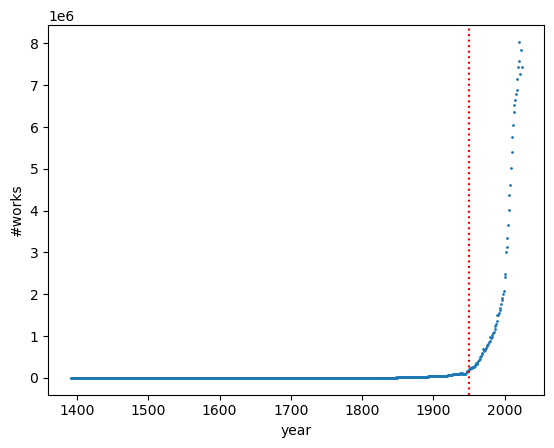

In [72]:
plt.scatter(years, work_counts, s=1)
plt.xlabel('year')
plt.ylabel('#works')
plt.axvline(1950, ls=':', c='red')

In [ ]:
plt.scatter(years[550:], work_counts[:400], s=1)
plt.xlabel('year')
plt.ylabel('#works')

In [73]:
print(Works().filter(to_publication_date='1950-01-01').count())

8235891


In [58]:
Works().filter(publication_year=1391).get()

[{'id': 'https://openalex.org/W4299937594',
  'doi': None,
  'title': 'Islamic Management; from Ideological Hybridization to Scientific Eclecticism',
  'display_name': 'Islamic Management; from Ideological Hybridization to Scientific Eclecticism',
  'publication_year': 1391,
  'publication_date': '1391-01-01',
  'ids': {'openalex': 'https://openalex.org/W4299937594'},
  'language': 'en',
  'primary_location': {'is_oa': False,
   'landing_page_url': 'https://doaj.org/article/960ec66a7d64451e96a4a8ba3945a6e7',
   'pdf_url': None,
   'source': {'id': 'https://openalex.org/S4306401280',
    'display_name': 'DOAJ (DOAJ: Directory of Open Access Journals)',
    'issn_l': None,
    'issn': None,
    'is_oa': True,
    'is_in_doaj': False,
    'is_indexed_in_scopus': False,
    'is_core': False,
    'host_organization': None,
    'host_organization_name': None,
    'host_organization_lineage': [],
    'host_organization_lineage_names': [],
    'type': 'repository'},
   'license': None,
   'lic

# Topics

In [43]:
Topics()['T14394']

{'id': 'https://openalex.org/T14394',
 'display_name': 'Cognitive Science and Education Research',
 'description': 'This cluster of papers explores the intersection of physics, cognitive science, and philosophy to understand the nature of mind, cognition, consciousness, language, emotions, and symbolic culture. It delves into topics such as neural networks, music, aesthetic emotions, philosophy of engineering, and the physics of selfhood.',
 'keywords': ['Physics of Mind',
  'Cognition',
  'Consciousness',
  'Language',
  'Emotions',
  'Neural Networks',
  'Symbolic Culture',
  'Philosophy of Engineering',
  'Music',
  'Aesthetic Emotions'],
 'ids': {'openalex': 'https://openalex.org/T14394',
  'wikipedia': 'https://en.wikipedia.org/wiki/Cognitive_science'},
 'subfield': {'id': 'https://openalex.org/subfields/2805',
  'display_name': 'Cognitive Neuroscience'},
 'field': {'id': 'https://openalex.org/fields/28',
  'display_name': 'Neuroscience'},
 'domain': {'id': 'https://openalex.org/d

In [30]:
topics = Topics()

In [47]:
topics.meta

{'count': 4516,
 'db_response_time_ms': 10,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

In [32]:
topic_tree = dict()  # domain-field-subfield-topic : number of works
work_count = 0
for t in chain(*topics.paginate(per_page=200)):
    domain = t['domain']['display_name']
    if domain not in topic_tree.keys():
        topic_tree[domain] = dict()
    field = t['field']['display_name']
    if field not in topic_tree[domain].keys():
        topic_tree[domain][field] = dict()
    subfield = t['subfield']['display_name']
    if subfield not in topic_tree[domain][field].keys():
        topic_tree[domain][field][subfield] = dict()
    topic_tree[domain][field][subfield][t['display_name']] = t['works_count']
    # print(t['display_name'], t['works_count'])
    work_count += t['works_count']
print(f'Number of work with topics {work_count}')

Number of work with topics 222980021


In [35]:
print(f'Number of domains: {len(topic_tree.keys())}')
for d in topic_tree.keys():
    num_works_in_d = 0
    for k1 in topic_tree[d].keys():
        for k2 in topic_tree[d][k1].keys():
            for k3 in topic_tree[d][k1][k2].keys():
                num_works_in_d += topic_tree[d][k1][k2][k3]
    print(f'Domain {d}({num_works_in_d}) has {len(topic_tree[d])} fields:')
    for k1 in topic_tree[d].keys():
        num_works_in_field = 0
        for k2 in topic_tree[d][k1].keys():
            for k3 in topic_tree[d][k1][k2].keys():
                num_works_in_field += topic_tree[d][k1][k2][k3]
        print(f'\t {k1}({num_works_in_field})')

Number of domains: 4
Domain Physical Sciences(78995938) has 10 fields:
	 Materials Science(7280904)
	 Engineering(26650215)
	 Environmental Science(9808043)
	 Computer Science(13027807)
	 Earth and Planetary Sciences(4238955)
	 Physics and Astronomy(7474080)
	 Chemistry(5393609)
	 Energy(1288964)
	 Chemical Engineering(717041)
	 Mathematics(3116320)
Domain Social Sciences(68505412) has 6 fields:
	 Social Sciences(33824742)
	 Arts and Humanities(14030823)
	 Economics, Econometrics and Finance(6026714)
	 Decision Sciences(2049037)
	 Psychology(5996114)
	 Business, Management and Accounting(6577982)
Domain Life Sciences(28991601) has 5 fields:
	 Agricultural and Biological Sciences(10869532)
	 Biochemistry, Genetics and Molecular Biology(11929036)
	 Neuroscience(3250686)
	 Immunology and Microbiology(2082668)
	 Pharmacology, Toxicology and Pharmaceutics(859679)
Domain Health Sciences(46487070) has 5 fields:
	 Medicine(38359283)
	 Health Professions(5938717)
	 Nursing(1050745)
	 Dentistry(

# Authors

In [58]:
authors = Authors().get()
authors.meta

{'count': 103467809,
 'db_response_time_ms': 61,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

In [27]:
sample_author = Authors().random()

In [28]:
print(json.dumps(sample_author, indent=4))

{
    "id": "https://openalex.org/A5037249940",
    "orcid": "https://orcid.org/0000-0003-2875-4560",
    "display_name": "Hyoungbae Ahn",
    "display_name_alternatives": [
        "Hyoungbae Ahn"
    ],
    "works_count": 3,
    "cited_by_count": 26,
    "summary_stats": {
        "2yr_mean_citedness": 2.6666666666666665,
        "h_index": 3,
        "i10_index": 1
    },
    "ids": {
        "openalex": "https://openalex.org/A5037249940",
        "orcid": "https://orcid.org/0000-0003-2875-4560"
    },
    "affiliations": [
        {
            "institution": {
                "id": "https://openalex.org/I2250650973",
                "ror": "https://ror.org/04w3jy968",
                "display_name": "Samsung (South Korea)",
                "country_code": "KR",
                "type": "funder",
                "lineage": [
                    "https://openalex.org/I2250650973"
                ]
            },
            "years": [
                2022
            ]
        }
    

# Data Prepare

In [114]:
class Alex:
    def __init__(self, works=None, load_path=None):
        self.author_n = 0
        self.paper_n = 0
        self.incidence_H = None  # authors * papers
        self.citation_A = None  # papers * papers
        self.works_idmap = dict()  # id -> openalexid. for following meta checking
        self.authors_idmap = dict()
        self.works_info = dict()  # id -> info
        if load_path is None:
            self.construct(works)
        else:
            self.load(load_path)
        pass
    
    def construct(self, works=None):
        if works is None:
            works = Works().filter(publication_year=2000,
                                   language='en',
                                   is_oa=True,
                                   authors_count='>1',
                                   concepts_count='>0',
                                   has_references=True,
                                   primary_topic={"domain":{'id': '2'}})  # 1 life, 2 social, 3 physical, 4 health
        print(works.get().meta)
        data = []
        row_ind = []
        col_ind = []
        works_idmap = dict()  # openalexid -> id
        authors_idmap = dict()
        # Iterate all works
        all_works = chain(*works.paginate(per_page=200, n_max=None))
        # print(len(all_works))
        # total_len = sum([1 for w in all_works])
        for work in tqdm(all_works, desc='Loading works...'):
            # Test for 1-time get
            # works = works.get()
            # for work in works:
            # find work and authors id, add to map dict, add authorship in indicence matrix
            work_openalex_id = work['id'].split('/W')[1]
            authors_openalex_id = [author['author']['id'].split('/A')[1] for author in work['authorships']]
            if work_openalex_id not in works_idmap.keys():
                works_idmap[work_openalex_id] = self.paper_n
                self.paper_n += 1
            for author_openalex_id in authors_openalex_id:
                if author_openalex_id not in authors_idmap.keys():
                    authors_idmap[author_openalex_id] = self.author_n
                    self.author_n += 1
                row_ind.append(authors_idmap[author_openalex_id])
                col_ind.append(works_idmap[work_openalex_id])
                data.append(1)
            # add work other info: citations, topics
            if works_idmap[work_openalex_id] not in self.works_info.keys():
                self.works_info[works_idmap[work_openalex_id]] = dict()
                self.works_info[works_idmap[work_openalex_id]]['citations'] = []
                for refer_work in work['referenced_works']:
                    refer_work_id = refer_work.split('/W')[1]
                    self.works_info[works_idmap[work_openalex_id]]['citations'].append(refer_work_id)
                if 'primary_topic' in work.keys() and work['primary_topic'] is not None:
                    self.works_info[works_idmap[work_openalex_id]]['topic'] = \
                        (work['primary_topic']['id'].split('/T')[1], \
                         work['primary_topic']['display_name'])
                    self.works_info[works_idmap[work_openalex_id]]['subfield'] = \
                        (work['primary_topic']['subfield']['id'].split('subfields/')[1], \
                         work['primary_topic']['subfield']['display_name'])
                    self.works_info[works_idmap[work_openalex_id]]['field'] = \
                        (work['primary_topic']['field']['id'].split('fields/')[1], \
                         work['primary_topic']['field']['display_name'])
                    self.works_info[works_idmap[work_openalex_id]]['domain'] = \
                        (work['primary_topic']['domain']['id'].split('domains/')[1], \
                         work['primary_topic']['domain']['display_name'])
                else:
                    self.works_info[works_idmap[work_openalex_id]]['topic'] = (None, None)
                    self.works_info[works_idmap[work_openalex_id]]['subfield'] = (None, None)
                    self.works_info[works_idmap[work_openalex_id]]['field'] = (None, None)
                    self.works_info[works_idmap[work_openalex_id]]['domain'] = (None, None)
        # print(len(data))
        self.incidence_H = csr_array((data, (row_ind, col_ind)))
        self.works_idmap = dict({works_idmap[k]:k for k in works_idmap.keys()})
        self.authors_idmap = dict({authors_idmap[k]:k for k in authors_idmap.keys()})
        self.summary()
        pass
    
    def summary(self):
        print(f"Number of Author {self.author_n}, Number of Paper {self.paper_n} \n", 
                  f"Average #_papers per author {self.incidence_H.sum() / self.author_n} \n", 
                  f"Average #_coauthors per paper {self.incidence_H.sum() / self.paper_n}")
        topics = set()
        for i in self.works_info:
            if self.works_info[i]['topic'][0] is not None:
                topics.add(self.works_info[i]['topic'][0])
        print(f"Number of topics {len(topics)}.")
        num_citation = []
        for i in self.works_info:
            num_citation.append(len(self.works_info[i]['citations']))
        print(f'Most cite {max(num_citation)} works, least cite {min(num_citation)} works.')
    
    def save(self, path):
        with open(path, 'wb') as f:
            pickle.dump([self.author_n, self.paper_n, self.incidence_H, 
                         self.citation_A, self.works_idmap, self.authors_idmap, self.works_info], f)
    
    def load(self, path):
        with open(path, 'rb') as f:
            attributes = pickle.load(f)
            self.author_n = attributes[0]
            self.paper_n = attributes[1]
            self.incidence_H = attributes[2]
            self.citation_A = attributes[3]
            self.works_idmap = attributes[4]
            self.authors_idmap = attributes[5]
            self.works_info = attributes[6]

In [84]:
alex = Alex()
path = './data/alex_preprocess_data.pkl'
alex.save(path)

{'count': 9251, 'db_response_time_ms': 190, 'page': 1, 'per_page': 25, 'groups_count': None}
Number of Author 65, Number of Paper 25 
 Average #_papers per author 1.1076923076923078 
 Average #_coauthors per paper 2.88
Number of topics 21.
Most cite 170 works, least cite 1 works.


In [85]:
alex = Alex(load_path=path)
alex.summary()

Number of Author 65, Number of Paper 25 
 Average #_papers per author 1.1076923076923078 
 Average #_coauthors per paper 2.88
Number of topics 21.
Most cite 170 works, least cite 1 works.


In [89]:
year = 2000
works = Works().filter(publication_year=year,
                                   language='en',
                                   is_oa=True,
                                   authors_count='>1',
                                   has_references=True,
                                   # primary_topic={"domain":{'id': '2'}}  # 1 life, 2 social, 3 physical, 4 health
                      )
print(works.get().meta)

{'count': 174669, 'db_response_time_ms': 111, 'page': 1, 'per_page': 25, 'groups_count': None}


In [94]:
path = f"./data/openaccess_en_geq2author_hascitation_year{year}.pkl"
alex = Alex(works)
alex.save(path)

{'count': 174669, 'db_response_time_ms': 111, 'page': 1, 'per_page': 25, 'groups_count': None}


Loading works...: 174669it [00:22, 7799.16it/s] 


Number of Author 521288, Number of Paper 174668 
 Average #_papers per author 1.5093940393793834 
 Average #_coauthors per paper 4.50471179609316
Number of topics 3660.
Most cite 2037 works, least cite 1 works.


In [96]:
year = 2001
works = Works().filter(publication_year=year,
                                   language='en',
                                   is_oa=True,
                                   authors_count='>1',
                                   has_references=True,
                                   # primary_topic={"domain":{'id': '2'}}  # 1 life, 2 social, 3 physical, 4 health
                      )
print(works.get().meta)
path = f"./data/openaccess_en_geq2author_hascitation_year{year}.pkl"
alex = Alex(works)
alex.save(path)

{'count': 187520, 'db_response_time_ms': 131, 'page': 1, 'per_page': 25, 'groups_count': None}
{'count': 187520, 'db_response_time_ms': 131, 'page': 1, 'per_page': 25, 'groups_count': None}


Loading works...: 187520it [00:27, 6881.09it/s] 


Number of Author 562711, Number of Paper 187520 
 Average #_papers per author 1.5303379532299883 
 Average #_coauthors per paper 4.592246160409556
Number of topics 3671.
Most cite 3026 works, least cite 1 works.


In [112]:
year = 1950
works = Works().filter(publication_year=year,
                                   language='en',
                                   is_oa=True,
                                   authors_count='>1',
                                   has_references=True,
                                   # primary_topic={"domain":{'id': '2'}}  # 1 life, 2 social, 3 physical, 4 health
                      )
path = f"./data/openaccess_en_geq2author_hascitation_year{year}.pkl"
alex = Alex(works)
alex.save(path)

{'count': 3177, 'db_response_time_ms': 191, 'page': 1, 'per_page': 25, 'groups_count': None}


Loading works...: 3177it [00:01, 2439.69it/s]


8824
Number of Author 6843, Number of Paper 3177 
 Average #_papers per author 1.289492912465293 
 Average #_coauthors per paper 2.7774630154233555
Number of topics 1125.
Most cite 755 works, least cite 1 works.


In [ ]:
for year in range(1951, 2000):
    path = f"./data/openaccess_en_geq2author_hascitation_year{year}.pkl"
    if os.path.exists(path) is False:
        print(f'retrieve {year}')
        works = Works().filter(publication_year=year,
                                       language='en',
                                       is_oa=True,
                                       authors_count='>1',
                                       has_references=True,
                                       # primary_topic={"domain":{'id': '2'}}  # 1 life, 2 social, 3 physical, 4 health
                          )
        start_t = time.time()
        alex = Alex(works)
        print(f"Year {year} data retrieve take {time.time()-start_t} s")
        alex.save(path)

retrieve 1995
{'count': 103286, 'db_response_time_ms': 93, 'page': 1, 'per_page': 25, 'groups_count': None}


Loading works...: 103286it [00:08, 12815.01it/s]


Number of Author 312237, Number of Paper 103286 
 Average #_papers per author 1.4055060739118042 
 Average #_coauthors per paper 4.248891427686231
Number of topics 3358.
Most cite 834 works, least cite 1 works.
Year 1995 data retrieve take 759.2249052524567 s
retrieve 1996
{'count': 124445, 'db_response_time_ms': 129, 'page': 1, 'per_page': 25, 'groups_count': None}


Loading works...: 124444it [00:10, 12387.16it/s]


Number of Author 376709, Number of Paper 124444 
 Average #_papers per author 1.4286810243450514 
 Average #_coauthors per paper 4.324812767188455
Number of topics 3444.
Most cite 985 works, least cite 1 works.
Year 1996 data retrieve take 1213.6818375587463 s
retrieve 1997
{'count': 139761, 'db_response_time_ms': 80, 'page': 1, 'per_page': 25, 'groups_count': None}


Loading works...: 139762it [00:11, 11964.03it/s]


Number of Author 417658, Number of Paper 139758 
 Average #_papers per author 1.4645092396171029 
 Average #_coauthors per paper 4.376593826471472
Number of topics 3457.
Most cite 847 works, least cite 1 works.
Year 1997 data retrieve take 1431.0662379264832 s
retrieve 1998
{'count': 155291, 'db_response_time_ms': 93, 'page': 1, 'per_page': 25, 'groups_count': None}


# Temporal topic counts

In [120]:
def get_topic_number(alex, topic_level="field", topic_name="Nursing"):
    counts = 0
    for work_i in alex.works_info.keys():
        if alex.works_info[work_i][topic_level][1] == topic_name:
            counts += 1
    return counts

In [122]:
topic_level = "field"
topic_name = "Environmental Science"
topic_counts = []
years = np.arange(1950, 1994)
for year in tqdm(years, desc="Year..."):
    path = f"./data/openaccess_en_geq2author_hascitation_year{year}.pkl"
    alex = Alex(load_path=path)
    topic_counts.append(get_topic_number(alex, topic_level, topic_name))

Year...: 100%|██████████| 44/44 [00:18<00:00,  2.33it/s]


Text(0.5, 1.0, 'field: Environmental Science')

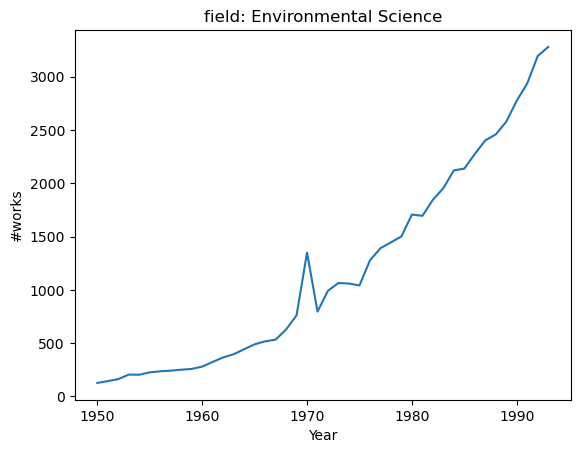

In [124]:
ax = plt.subplot()
ax.plot(years, topic_counts)
ax.set_xlabel("Year")
ax.set_ylabel("#works")
ax.set_title(f"{topic_level}: {topic_name}")

Year...: 100%|██████████| 44/44 [00:16<00:00,  2.68it/s]


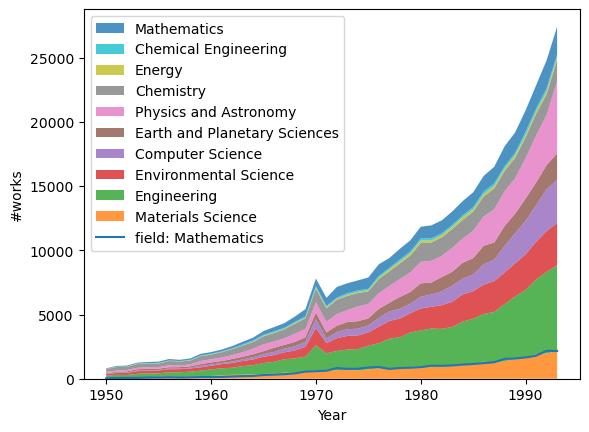

In [128]:
topic_counts_byf = dict()
for f in topic_tree["Physical Sciences"].keys():
    # print(f)
    topic_level = "field"
    topic_name = f
    topic_counts_byf[f] = []
    years = np.arange(1950, 1994)
    for year in tqdm(years, desc="Year..."):
        path = f"./data/openaccess_en_geq2author_hascitation_year{year}.pkl"
        alex = Alex(load_path=path)
        topic_counts_byf[f].append(get_topic_number(alex, topic_level, topic_name))
# ax.plot(years, topic_counts, label=f"{topic_level}: {topic_name}")
ax.stackplot(years, topic_counts_byf.values(),

(10, 44)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


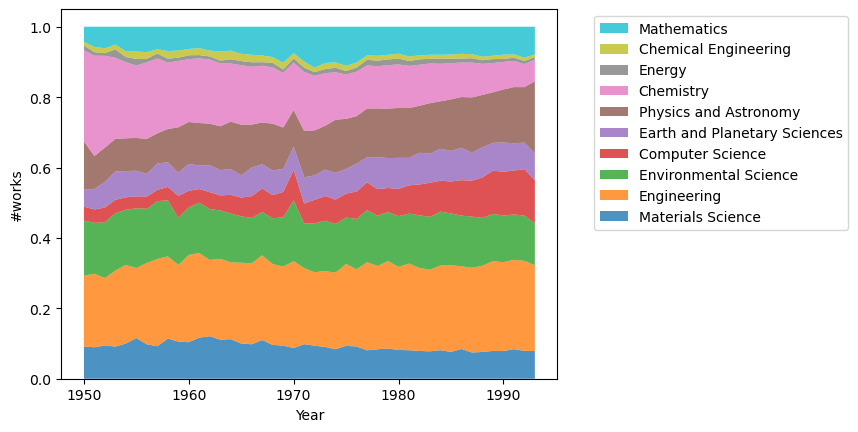

In [152]:
ax = plt.subplot()
stack_value = np.array(list(topic_counts_byf.values()))
print(np.shape(stack_value))
print(np.sum(stack_value/np.sum(stack_value, 0)[np.newaxis, :], 0))
# print(stack_value)
ax.stackplot(years, stack_value/np.sum(stack_value, 0)[np.newaxis, :],labels=topic_counts_byf.keys(), alpha=0.8)
ax.set_xlabel("Year")
ax.set_ylabel("#works")
# ax.set_title(f"{topic_level}: {topic_name}")
ax.legend(bbox_to_anchor=(1.6, 1), reverse=True)

Text(0.5, 1.0, 'field: Mathematics')

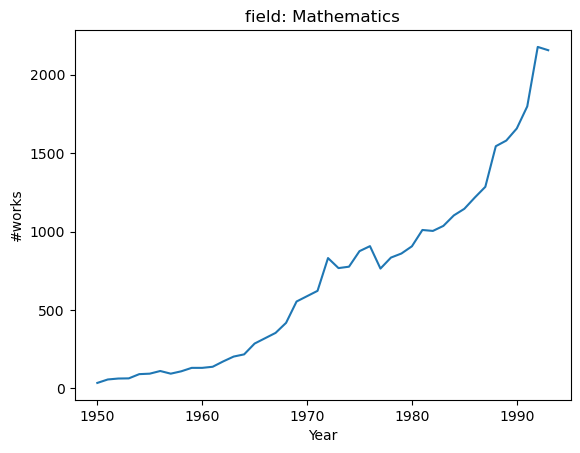

In [133]:
field = "Mathematics"
topic_counts = topic_counts_byf[field]
ax = plt.subplot()
ax.plot(years, topic_counts)
ax.set_xlabel("Year")
ax.set_ylabel("#works")
ax.set_title(f"{topic_level}: {field}")

In [ ]:
TODO temporal hyper graph